In [216]:
# IMPORTING LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import ttest_ind
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

#### QUESTION 1

In [217]:
# READING THE EirGrid INTRADAY 15-MINUTE ENERGY DEMAND FOR 2014
eirGrid2014 = pd.read_csv("EirGridSystemDemand2014.csv", parse_dates = True)

# SEE IF THERE ARE NANS and EMPTY FIELDS
eirGrid2014.info()

# CHECK THE FIRST 5 ROWS OF THE DATAFRAME
eirGrid2014.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    35040 non-null  object 
 1   Time    35040 non-null  object 
 2   Demand  35035 non-null  float64
dtypes: float64(1), object(2)
memory usage: 821.4+ KB


,Date,Time,Demand
0,1/1/2014,0:00,2899.0
1,1/1/2014,0:15,2869.0
2,1/1/2014,0:30,2827.0
3,1/1/2014,0:45,2787.0
4,1/1/2014,1:00,2724.0


In [218]:
# FILLING NAN VALUES IN THE DATAFRAME - USING LINEAR INTERPOLATION
eirGrid2014 = eirGrid2014.interpolate(method="linear", limit_direction='forward')

# SEE IF THERE ARE NANS and EMPTY FIELDS
eirGrid2014.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    35040 non-null  object 
 1   Time    35040 non-null  object 
 2   Demand  35040 non-null  float64
dtypes: float64(1), object(2)
memory usage: 821.4+ KB


In [219]:
# CHANGE TIME TO HOUR FORMAT BY ADDING 0 AS SECONDS
eirGrid2014['Time'] = eirGrid2014['Time'].astype(str) + ':00'

# CREATING AND APPENDING THE Datetime
eirGrid2014["Datetime"] = pd.to_datetime(
    eirGrid2014['Date']) + pd.to_timedelta(eirGrid2014["Time"])
eirGrid2014.tail()

,Date,Time,Demand,Datetime
35035,12/31/2014,22:45:00,2779.0,2014-12-31 22:45:00
35036,12/31/2014,23:00:00,2876.0,2014-12-31 23:00:00
35037,12/31/2014,23:15:00,2961.0,2014-12-31 23:15:00
35038,12/31/2014,23:30:00,2957.0,2014-12-31 23:30:00
35039,12/31/2014,23:45:00,2948.0,2014-12-31 23:45:00


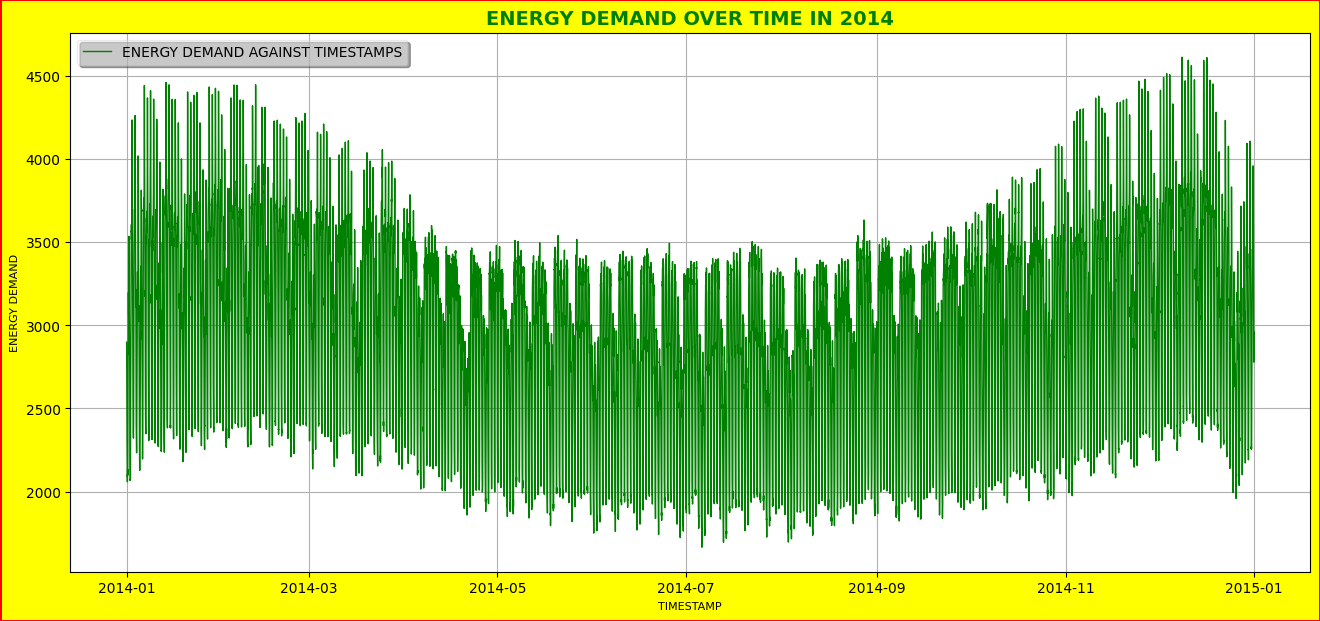

In [220]:
# PRODUCING A GRAPHIC SHOWING THE TIME SERIES FOR ENERGY DEMAND FOR 2014
x = eirGrid2014["Datetime"]
y = eirGrid2014["Demand"]

# SETTING THE SIZE OF THE GRAPH, THE COLOURS, THE LINE WIDTH, AS WELL AS THE LABELS AND TITLE
plt.figure(figsize=(16, 7), edgecolor="red", facecolor="yellow", linewidth=1)
plt.xlabel("TIMESTAMP", color="black", fontsize=8)
plt.ylabel("ENERGY DEMAND", color="black", fontsize=8)
plt.title("ENERGY DEMAND OVER TIME IN 2014", color="green",
          fontsize=14, fontweight="bold")

# PLOTTING THE GRAPH OF ENERGY DEMAND AGAINST TIMESTAMPS
plt.plot(x, y, label="ENERGY DEMAND AGAINST TIMESTAMPS",
         color="green", linewidth=1)

# ADDING A LEGEND, A GRID AND SHOWING THE GRAPH
plt.legend(loc="upper left", frameon=True,
           framealpha=.4, shadow=True, borderpad=.4)
plt.grid()
plt.show()

#### QUESTION 2

In [221]:
# AUTOCORRELATION COEFFICIENTS FOR THE ENERGY DEMAND
lags = 10 * 24 * 4
autoCorr = sm.tsa.acf(eirGrid2014['Demand'], nlags=lags)
eirGridAutoCorr = pd.DataFrame(autoCorr)
eirGridAutoCorr.rename(columns={0: 'AutoCorrelation'})

,AutoCorrelation
0,1.000000
1,0.996103
2,0.985689
3,0.969448
4,0.948211
...,...
956,0.746984
957,0.764598
958,0.777886
959,0.786296


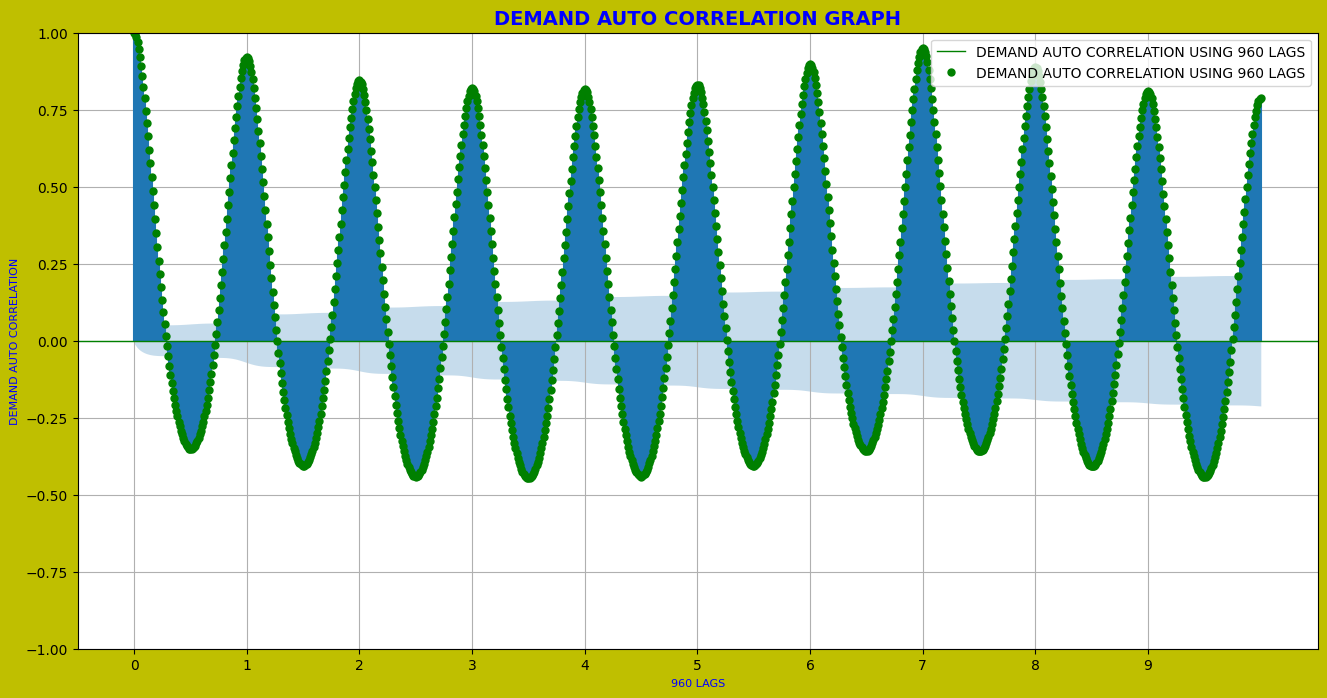

In [222]:
# PLOTTING THE AUTOCORRELATION GRAPH FOR THE ENERGY DEMAND DATA
plot_acf(eirGrid2014['Demand'], lags=lags,
         label="DEMAND AUTO CORRELATION USING 960 LAGS", color="green", linewidth=1)

# PLOT PROPERTIES FOR THE AUTOCORRELATION GRAPH
plt.rcParams["figure.figsize"] = (16, 8)
plt.rcParams["figure.facecolor"] = "y"
plt.rcParams["figure.edgecolor"] = "r"
plt.xticks(np.arange(0, 960, 96), np.arange(10)) # 10 DAYS

# PLOT PROPERTIES FOR THE AUTOCORRELATION GRAPH
plt.title("DEMAND AUTO CORRELATION GRAPH", color="blue",
          fontsize=14, fontweight="bold")
plt.xlabel("960 LAGS", color="blue", fontsize=8)
plt.ylabel("DEMAND AUTO CORRELATION", color="blue", fontsize=8)

# ADDING A LEGEND, A GRID AND SHOWING THE GRAPH
plt.legend(loc="upper right", frameon=True)
plt.grid()
plt.show()


#### QUESTION 3


In [223]:
# NORMALIZING TIMESCALES
eirGrid2014["Numeric Date"] = pd.to_numeric(eirGrid2014["Datetime"], downcast="integer")

# Assigning the existing date to the new scale 0-1. Formula: Xchanged=(X−Xmin)/(Xmax−Xmin)
eirGrid2014["Time Scale"] = (eirGrid2014["Numeric Date"] - eirGrid2014["Numeric Date"].min()) / (eirGrid2014["Numeric Date"].max() - eirGrid2014["Numeric Date"].min())
eirGrid2014.head()


,Date,Time,Demand,Datetime,Numeric Date,Time Scale
0,1/1/2014,0:00:00,2899.0,2014-01-01 00:00:00,1388534400000000000,0.000000
1,1/1/2014,0:15:00,2869.0,2014-01-01 00:15:00,1388535300000000000,0.000029
2,1/1/2014,0:30:00,2827.0,2014-01-01 00:30:00,1388536200000000000,0.000057
3,1/1/2014,0:45:00,2787.0,2014-01-01 00:45:00,1388537100000000000,0.000086
4,1/1/2014,1:00:00,2724.0,2014-01-01 01:00:00,1388538000000000000,0.000114


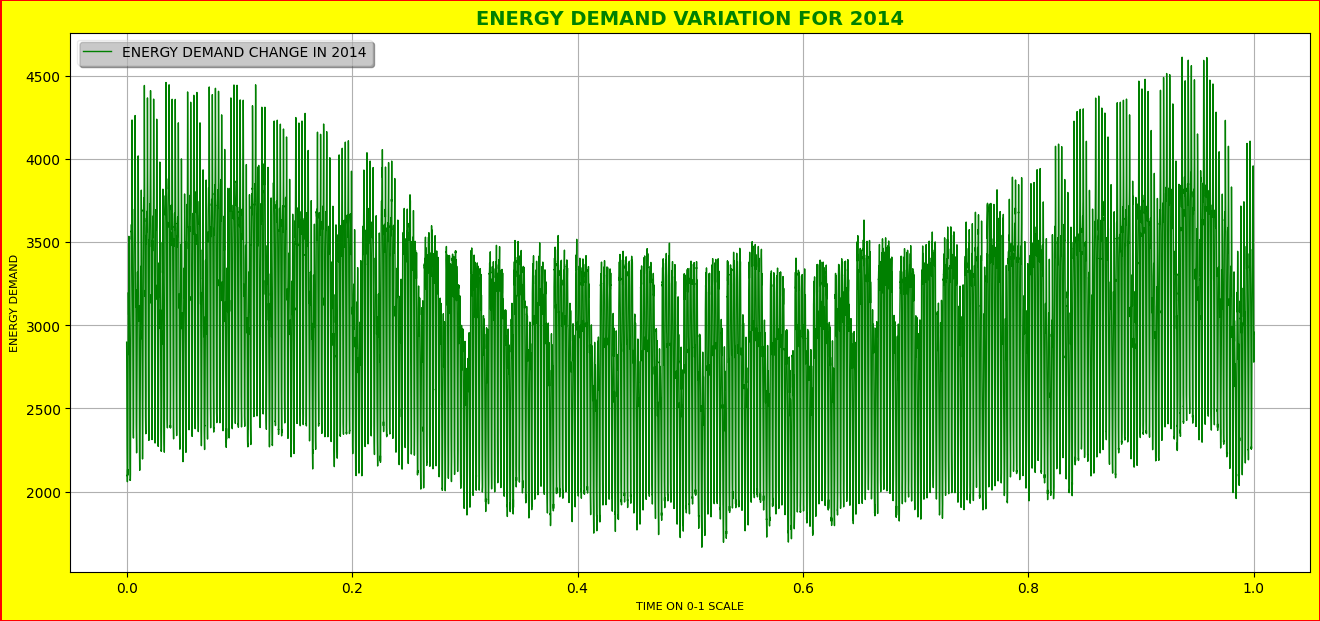

In [224]:
# PRODUCING A GRAPHIC SHOWING THE TIME SERIES FOR ENERGY DEMAND FOR 2014
x = eirGrid2014["Time Scale"]
y = eirGrid2014["Demand"]

# SETTING THE SIZE OF THE GRAPH, THE COLOURS, THE LINE WIDTH, AS WELL AS THE LABELS AND TITLE
plt.figure(figsize=(16, 7), edgecolor="red", facecolor="yellow", linewidth=1)
plt.xlabel("TIME ON 0-1 SCALE", color="black", fontsize=8)
plt.ylabel("ENERGY DEMAND", color="black", fontsize=8)
plt.title("ENERGY DEMAND VARIATION FOR 2014", color="green",
          fontsize=14, fontweight="bold")

# PLOTTING THE GRAPH OF ENERGY DEMAND AGAINST TIME ON 0-1 SCALE
plt.plot(x, y, label="ENERGY DEMAND CHANGE IN 2014",
         color="green", linewidth=1)

# ADDING A LEGEND, A GRID AND SHOWING THE GRAPH
plt.legend(loc="upper left", frameon=True,
           framealpha=.4, shadow=True, borderpad=.4)
plt.grid()
plt.show()


#### QUESTION 4

In [225]:
# AVERAGE ENERGY DEMAND FOR EACH MONTH IN 2014
eirGrid2014['Month'] = eirGrid2014['Datetime'].dt.month_name()

# GROUPING THE DATA BY MONTH AND CALCULATING THE MEAN
monthlyEirGrid2014 = eirGrid2014.groupby(
    pd.Grouper(key='Month', axis=0)).mean()

monthlyEirGrid2014

,Demand,Numeric Date,Time Scale
Month,,,
January,3226.265793,1.389873e+18,0.042453
February,3247.410342,1.392422e+18,0.123277
March,3093.453629,1.394971e+18,0.204101
April,2844.273264,1.397606e+18,0.287665
May,2767.462030,1.400241e+18,0.371229
June,2695.365278,1.402876e+18,0.454793
July,2695.177083,1.405512e+18,0.538357
August,2681.552419,1.408190e+18,0.623291
September,2806.761111,1.410825e+18,0.706855


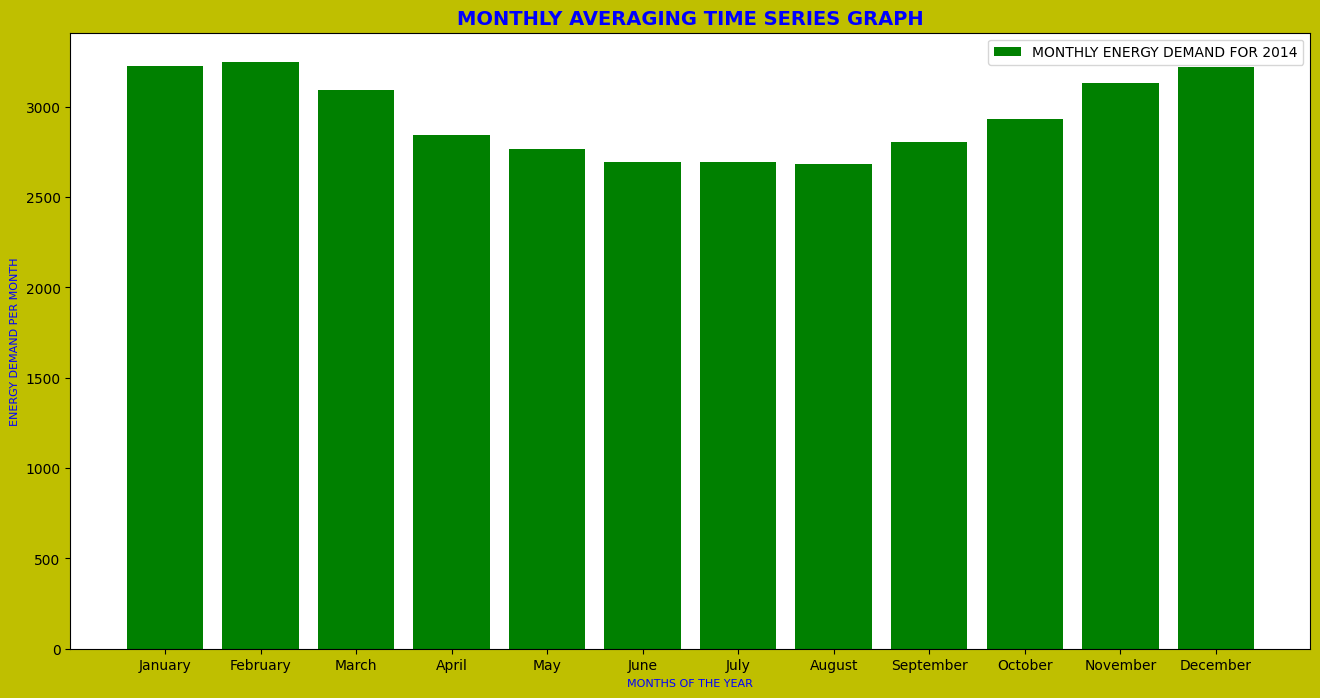

In [226]:
# PRODUCING A BAR GRAPH SHOWING MONTHLY ENERGY DEMAND FOR 2014
x = monthlyEirGrid2014.index.values
y = monthlyEirGrid2014["Demand"]

# PLOT PROPERTIES FOR THE GRAPH
plt.rcParams["figure.figsize"] = (16, 8)
plt.rcParams["figure.facecolor"] = "y"
plt.rcParams["figure.edgecolor"] = "r"
plt.title("MONTHLY AVERAGING TIME SERIES GRAPH", color="blue",
          fontsize=14, fontweight="bold")
plt.xlabel("MONTHS OF THE YEAR", color="blue", fontsize=8)
plt.ylabel("ENERGY DEMAND PER MONTH", color="blue", fontsize=8)

# PLOTTING THE GRAPH OF ENERGY DEMAND AGAINST TIMESTAMPS
plt.bar(x, y, label="MONTHLY ENERGY DEMAND FOR 2014",
         color="green", linewidth=1)

# ADDING A LEGEND, A GRID AND SHOWING THE GRAPH
plt.legend(loc="upper right", frameon=True)
plt.show()


#### QUESTION 5

In [227]:
# AVERAGE DEMAND FOR EACH HOUR OF THE DAY FOR THE WHOLE YEAR - GROUP BY HOUR & CALCULATE MEAN
# ADDING A COLUMN TO THE DATAFRAME CALLED "Hourly" AND ASSIGNING THE HOUR VALUE TO IT
eirGrid2014['Hourly'] = eirGrid2014['Datetime'].dt.hour

# GROUPING THE DATA BY HOUR AND CALCULATING THE MEAN
avgHourlyEirGrid2014 = eirGrid2014[['Demand']
                                  ].groupby(eirGrid2014['Hourly']).mean()

# DISPLAYING THE HOUR VALUES AND THE AVERAGE ENERGY DEMAND FOR EACH HOUR
avgHourlyEirGrid2014

,Demand
Hourly,
0,2531.269178
1,2330.620548
2,2193.935616
3,2122.717123
4,2102.480137
5,2116.065068
6,2272.093151
7,2661.797260
8,2990.205479


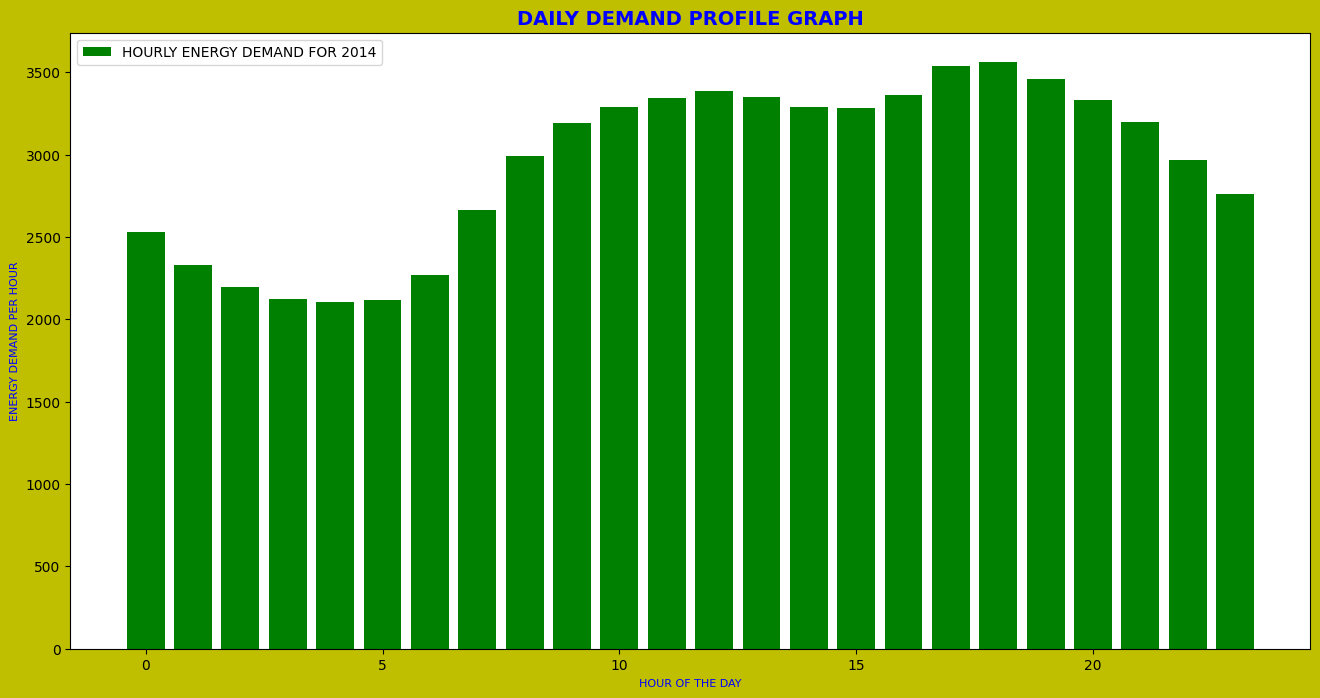

In [228]:
# PRODUCING A BAR GRAPH SHOWING MONTHLY ENERGY DEMAND FOR 2014
x = avgHourlyEirGrid2014.index.values
y = avgHourlyEirGrid2014["Demand"]

# PLOT PROPERTIES FOR THE AUTOCORRELATION GRAPH
plt.rcParams["figure.figsize"] = (16, 8)
plt.rcParams["figure.facecolor"] = "y"
plt.rcParams["figure.edgecolor"] = "r"

# PLOT PROPERTIES FOR THE AUTOCORRELATION GRAPH
plt.title("DAILY DEMAND PROFILE GRAPH", color="blue",
          fontsize=14, fontweight="bold")
plt.xlabel("HOUR OF THE DAY", color="blue", fontsize=8)
plt.ylabel("ENERGY DEMAND PER HOUR", color="blue", fontsize=8)

# PLOTTING THE GRAPH OF ENERGY DEMAND AGAINST TIMESTAMPS
plt.bar(x, y, label="HOURLY ENERGY DEMAND FOR 2014",
        color="green", linewidth=1)

# ADDING A LEGEND, A GRID AND SHOWING THE GRAPH
plt.legend(loc="upper left", frameon=True)
plt.show()


#### QUESTION 6

In [229]:
# ADD Days COLUMN TO DATAFRAME AND SET TO WEEKDAY NAME FROM DATETIME COLUMN 
eirGrid2014['Days'] = eirGrid2014['Datetime'].dt.day_name()

# CALCULATE MEAN ENERGY DEMAND FOR EACH DAY OF THE WEEK
avgDailyEirGrid2014 = eirGrid2014[['Demand']].groupby(eirGrid2014['Days']).mean()

# SORT BY DAYS COLUMN TO DISPLAY DAYS FROM MONDAY TO SUNDAY USING DICTIONARY
daysOrder = {'Monday': 0, 'Tuesday': 1, 'Wednesday': 2,
              'Thursday': 3, 'Friday': 4, 'Saturday': 5, 'Sunday': 6}

# PUTTING THE DAYS IN ORDER USING THE DICTIONARY
avgDailyEirGrid2014 = avgDailyEirGrid2014.sort_values(
    by='Days', key=lambda x: x.map(daysOrder))

# DISPLAYING SORTED AVERAGE ENERGY DEMAND FOR EACH DAY OF THE WEEK
avgDailyEirGrid2014

,Demand
Days,
Monday,2966.307292
Tuesday,3052.404647
Wednesday,3059.144458
Thursday,3063.700521
Friday,3031.418470
Saturday,2783.925681
Sunday,2644.316707


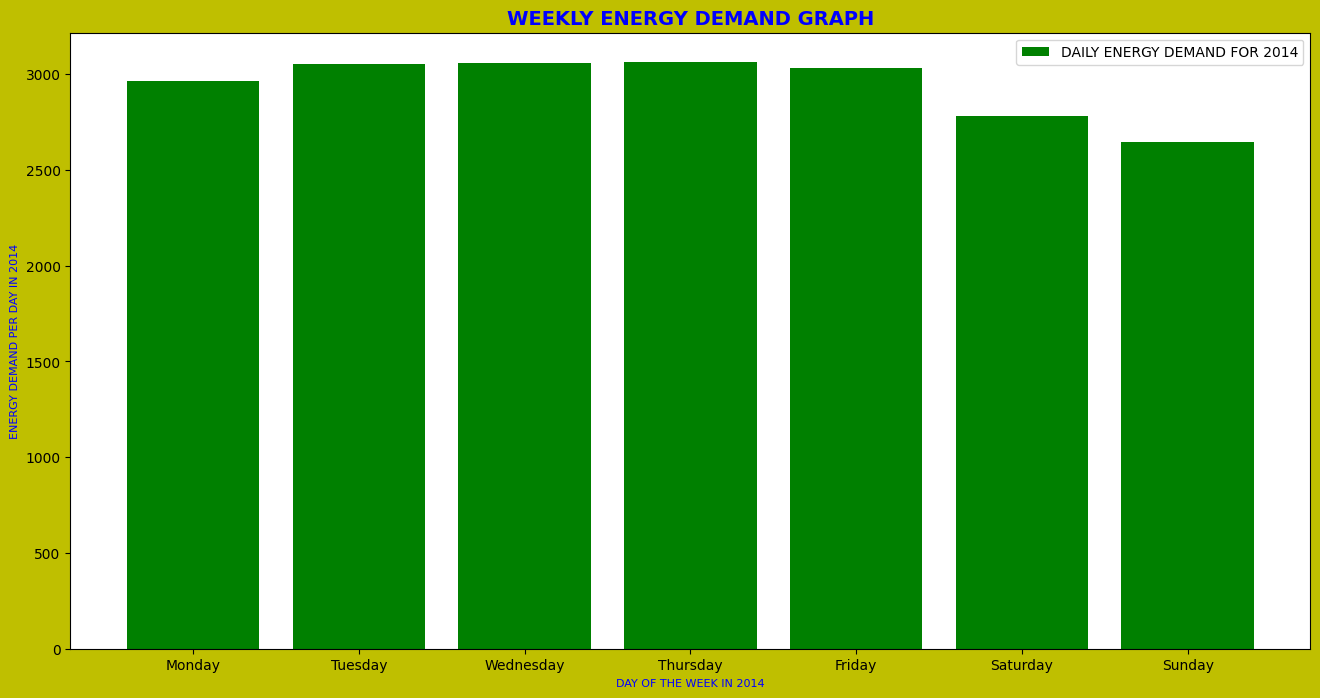

In [230]:
# PRODUCING A BAR GRAPH SHOWING DAILY ENERGY DEMAND FOR 2014
x = avgDailyEirGrid2014.index.values
y = avgDailyEirGrid2014["Demand"]

# PLOT PROPERTIES FOR THE DAILY DEMAND GRAPH
plt.rcParams["figure.figsize"] = (16, 8)
plt.rcParams["figure.facecolor"] = "y"
plt.rcParams["figure.edgecolor"] = "r"

# PLOT PROPERTIES FOR THE DAILY DEMAND GRAPH
plt.title("WEEKLY ENERGY DEMAND GRAPH", color="blue",
          fontsize=14, fontweight="bold")
plt.xlabel("DAY OF THE WEEK IN 2014", color="blue", fontsize=8)
plt.ylabel("ENERGY DEMAND PER DAY IN 2014", color="blue", fontsize=8)

# PLOTTING THE GRAPH OF ENERGY DEMAND AGAINST TIMESTAMPS
plt.bar(x, y, label="DAILY ENERGY DEMAND FOR 2014",
        color="green", linewidth=1)

# ADDING A LEGEND, A GRID AND SHOWING THE GRAPH
plt.legend(loc="upper right", frameon=True)
plt.show()

#### QUESTION 7

In [231]:
# VARIATIONS OF THE DAILY DEMAND PROFILES FOR EACH DAY OF THE WEEK
dailyProfiles = eirGrid2014.groupby(
    ['Days', eirGrid2014['Datetime'].dt.hour]).mean().unstack()

# SORT BY DAYS COLUMN TO DISPLAY DAYS FROM MONDAY TO SUNDAY
dailyDemand = dailyProfiles['Demand'].reindex(daysOrder.keys())

# TRANSPOSING THE DATAFRAME TO DISPLAY THE DATA IN A HORIZONTAL FORMAT
dailyDemand = dailyDemand.transpose()
dailyDemand


Days,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
Datetime,,,,,,,
0,2391.326923,2510.788462,2553.466981,2563.740385,2580.211538,2609.100962,2509.822115
1,2212.317308,2318.504808,2351.047170,2355.471154,2375.052885,2386.254808,2315.302885
2,2093.615385,2193.745192,2220.330189,2220.687500,2235.759615,2226.533654,2166.370192
3,2032.706731,2130.639423,2155.500000,2158.735577,2168.706731,2138.514423,2073.586538
4,2023.168269,2121.923077,2140.292453,2146.048077,2153.413462,2101.947115,2029.841346
5,2050.812500,2148.014423,2164.051887,2176.403846,2179.826923,2089.961538,2002.461538
6,2245.923077,2354.802885,2369.641509,2380.985577,2378.764423,2156.581731,2016.076923
7,2704.875000,2856.302885,2865.608491,2880.221154,2865.163462,2343.307692,2113.182692
8,3075.024038,3233.456731,3235.207547,3249.216346,3232.235577,2607.961538,2293.625000


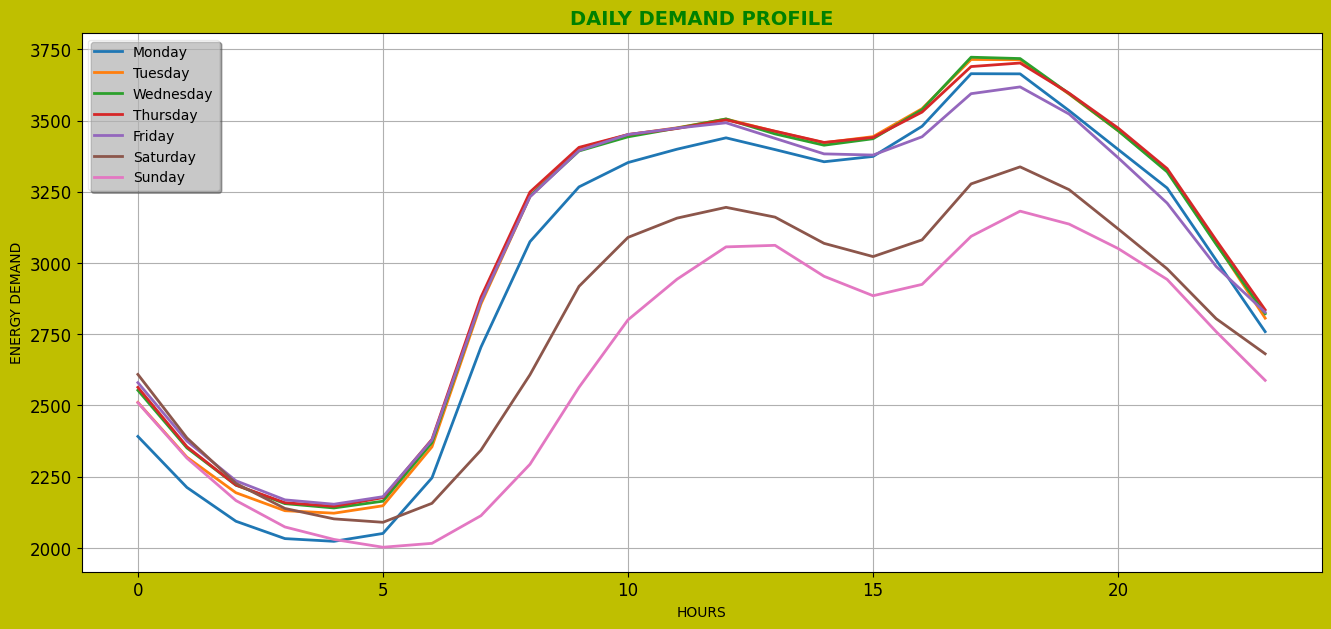

In [232]:
# PLOTTING DAILY DEMAND PROFILE FOR EACH DAY OF THE WEEK
dailyDemand.plot(kind='line', figsize=(16, 7), linewidth=2, fontsize=12)

plt.title("DAILY DEMAND PROFILE", color="green",
          fontsize=14, fontweight="bold")
plt.xlabel("HOURS", color="black", fontsize=10)
plt.ylabel("ENERGY DEMAND", color="black", fontsize=10)

# ADDING A LEGEND, A GRID AND SHOWING THE GRAPH
plt.legend(loc="upper left", frameon=True,
           framealpha=.4, shadow=True, borderpad=.4)
plt.grid()
plt.show()


#### QUESTION 8

In [233]:
# ADDING THE DAY OF DAY NUMBER TO THE DATAFRAME
eirGrid2014['Days of Week'] = eirGrid2014['Datetime'].dt.dayofweek

# WEEKDAYS DATAFRAME
weekdaysData = eirGrid2014[eirGrid2014['Days of Week'] < 5]

# WEEKEND DATAFRAME
weekendData = eirGrid2014[eirGrid2014['Days of Week'] >= 5]


In [234]:
# CALCULATING THE T-TEST STATISTICS AND P-VALUE - equal_var=False FOR UNEQUAL VARIANCES
t_statistics, p_value = ttest_ind(weekdaysData['Demand'], weekendData['Demand'], equal_var=False)

# PRINTING THE RESULTS
print("p-value :", p_value)
print("t-statistics:", t_statistics)

p-value : 0.0
t-statistics: 51.363399969318884


#### QUESTION 9

In [235]:
# SIMPLE BENCHMARK FORECASTING - DIVIDING THE DF INTO 2 HALVES
half2 = eirGrid2014[int(len(eirGrid2014)/2):]  # 2nd HALF

# FORECASTING HORIZONS ARRAY - Horizons for 1 day =  24 x 4 = 96, 
horizonsForec = []

# MEAN ABSOLUTE ERROR ARRAYS
errMAEarr = []

# CALCULATING THE MEAN ABSOLUTE ERROR FOR EACH FORECASTING HORIZON
for idx in np.arange(0, 96, 1):
    
    # SHIFTING THE DATAFRAME BY THE FORECASTING HORIZON
    afterShifting=eirGrid2014["Demand"].shift(idx+1)
    pd.DataFrame(afterShifting) # CONVERTING THE SERIES TO A DATAFRAME
    
    # 2nd HALF OF THE DATAFRAME EXTRACTION
    afterShifting2 = afterShifting[int(len(afterShifting)/2):]

    # MEAN ABSOLUTE ERROR EVALUATION USING ONLY THE SECOND HALF OF THE DATAFRAME
    errMAEarr.append(mean_absolute_error(half2.Demand, afterShifting2.values))
    
    # FORESCASTING HORIZONS ARRAY - STORE THE FORECASTING HORIZONS, 1 DAY = 96 HORIZONS
    horizonsForec.append(idx+1)

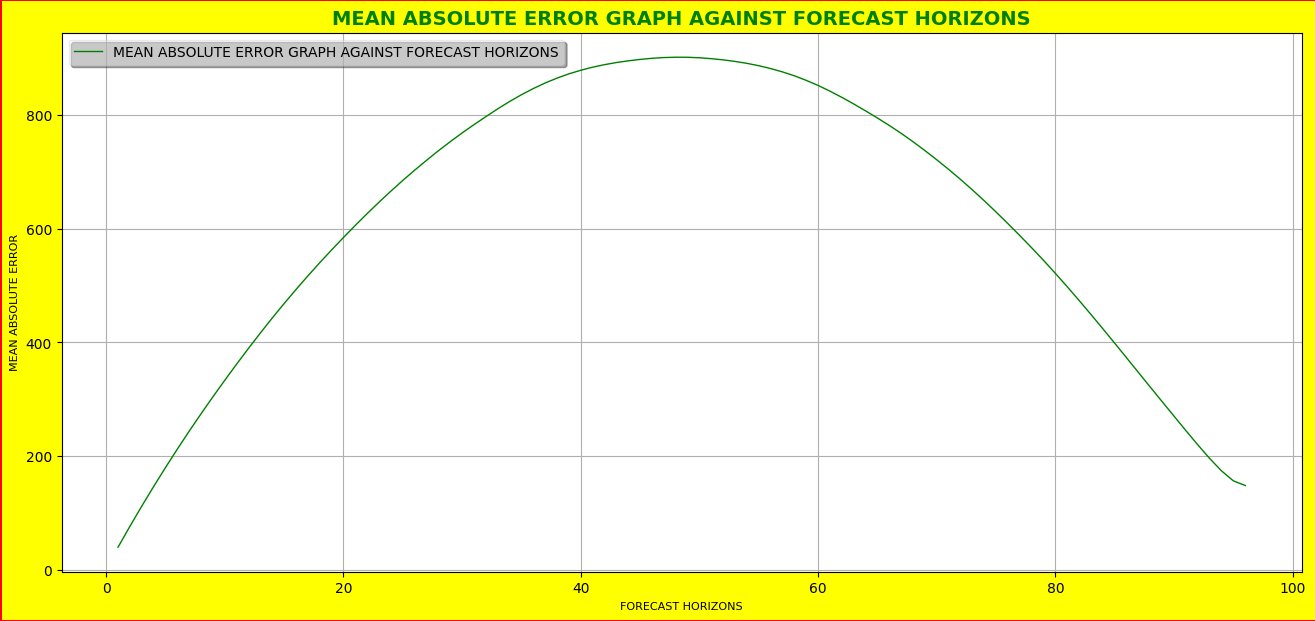

In [236]:
# PLOTTING THE MEAN ABSOLUTE ERROR GRAPH AGAINST FORECAST HORIZONS UP TO ONE DAY AHEAD
x = horizonsForec
y = errMAEarr

# SETTING THE SIZE OF THE GRAPH, THE COLOURS, THE LINE WIDTH, AS WELL AS THE LABELS AND TITLE
plt.figure(figsize=(16, 7), edgecolor="red", facecolor="yellow", linewidth=1)
plt.xlabel("FORECAST HORIZONS", color="black", fontsize=8)
plt.ylabel("MEAN ABSOLUTE ERROR", color="black", fontsize=8)
plt.title("MEAN ABSOLUTE ERROR GRAPH AGAINST FORECAST HORIZONS", color="green",
          fontsize=14, fontweight="bold")

# PLOTTING THE GRAPH OF ENERGY DEMAND AGAINST TIMESTAMPS
plt.plot(x, y, label="MEAN ABSOLUTE ERROR GRAPH AGAINST FORECAST HORIZONS",
         color="green", linewidth=1)

# ADDING A LEGEND, A GRID AND SHOWING THE GRAPH
plt.legend(loc="upper left", frameon=True,
           framealpha=.4, shadow=True, borderpad=.4)
plt.grid()
plt.show()


#### QUESTION 10

In [237]:
# FORECASTING HORIZONS ARRAY
horizonsForec = []

# MEAN ABSOLUTE ERROR ARRAYS
errMAEarr = []

# FORECASTING INDIVIDUAL DAYS OF THE WEEK FOR THE 2ND HALF OF THE YEAR 2014
for idx in np.arange(0, 96, 1):
    # SHIFTING THE DATAFRAME BY THE FORECASTING HORIZONS
    afterShifting = eirGrid2014["Demand"].shift(idx+1)
    pd.DataFrame(afterShifting) # CONVERTING THE SERIES TO A DATAFRAME

    # EXTRACTION OF THE 2ND HALF OF THE DATAFRAME
    afterShifting2 = afterShifting.iloc[int(len(afterShifting)/2):]

    # MEAN ABSOLUTE PERCENTAGE ERROR EVALUATION USING ONLY THE SECOND HALF OF THE DATAFRAME
    errMAEarr.append(
        100*(mean_absolute_percentage_error(half2.Demand, afterShifting2.values)))
    
    # FORECASTING HORIZONS
    horizonsForec.append(idx+1)

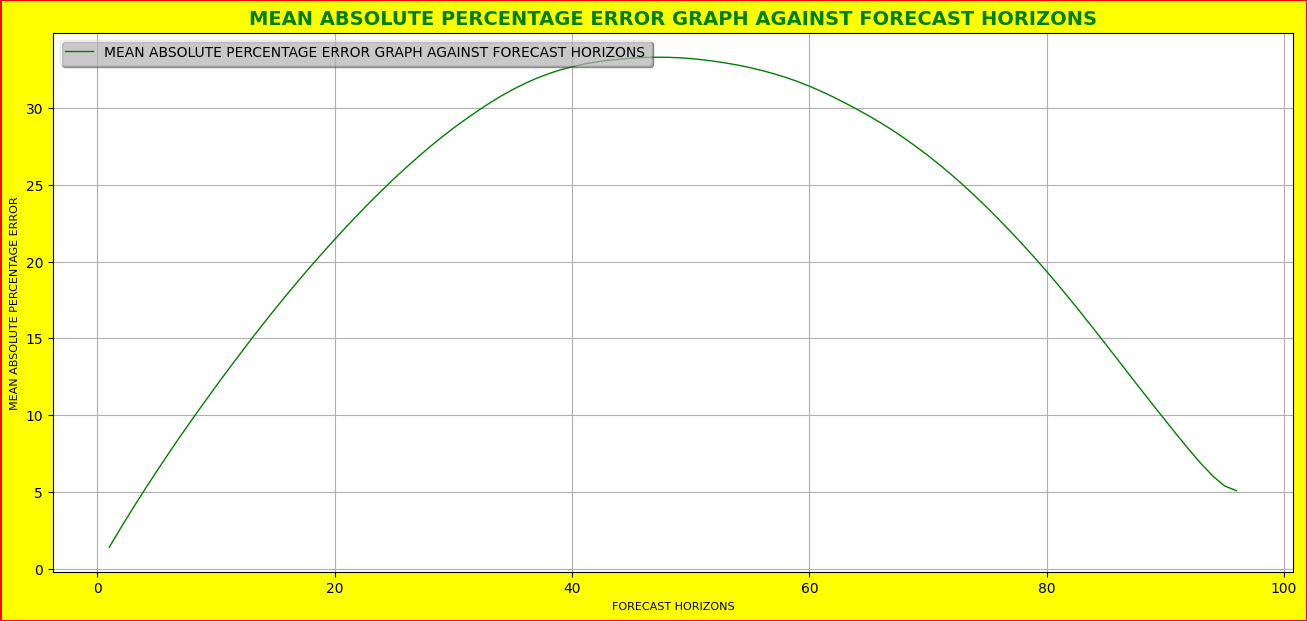

In [238]:
# PLOTTING THE MEAN ABSOLUTE PERCENTAGE ERROR GRAPH AGAINST FORECAST HORIZONS UP TO ONE DAY AHEAD
x = horizonsForec
y = errMAEarr

# SETTING THE SIZE OF THE GRAPH, THE COLOURS, THE LINE WIDTH, AS WELL AS THE LABELS AND TITLE
plt.figure(figsize=(16, 7), edgecolor="red", facecolor="yellow", linewidth=1)
plt.xlabel("FORECAST HORIZONS", color="black", fontsize=8)
plt.ylabel("MEAN ABSOLUTE PERCENTAGE ERROR", color="black", fontsize=8)
plt.title("MEAN ABSOLUTE PERCENTAGE ERROR GRAPH AGAINST FORECAST HORIZONS", color="green",
          fontsize=14, fontweight="bold")

# PLOTTING THE GRAPH OF ENERGY DEMAND AGAINST TIMESTAMPS
plt.plot(x, y, label="MEAN ABSOLUTE PERCENTAGE ERROR GRAPH AGAINST FORECAST HORIZONS",
         color="green", linewidth=1)

# ADDING A LEGEND, A GRID AND SHOWING THE GRAPH
plt.legend(loc="upper left", frameon=True,
           framealpha=.4, shadow=True, borderpad=.4)
plt.grid()
plt.show()